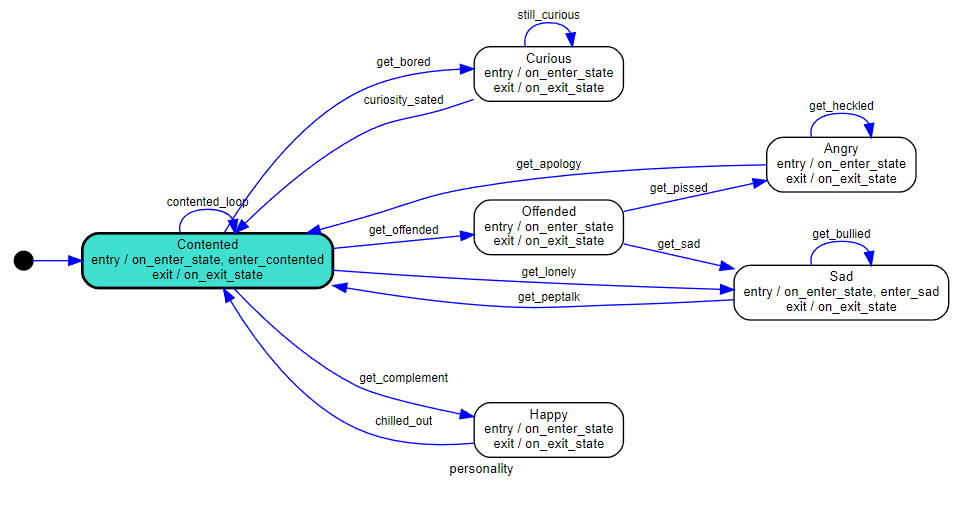

In [1]:
from statemachine import StateMachine, State

In [506]:
class personality(StateMachine):
    "A Chatbot emotional model"
    
    # Define internal vars
    boring_message_count = 0
    bored_message_threshold = 4
    
    
    mood = 0
    mood_threshold = 4
    gassed_up = True
    
    def mood_stats(self):
        print(f"State: {self.current_state.id}")
        if self.gassed_up: print(f"Mood: {self.mood}, Gassed up")
        else: print(f"Mood: {self.mood}")
        print(f"Bored: {self.boring_message_count}/{self.bored_message_threshold}")
      
    # Define internal states
    contented = State(initial=True)
    curious = State()
    
    offended = State()
    angry = State()
    sad = State()

    happy = State()
    
    #Define State functions
    def on_enter_state(self, event, state):
        if state.id != 'contented':
            self.boring_message_count = 0
        print(f"Entering '{state.id}' state from '{event}' event.")
        
    def on_exit_state(self, event, state):
        print(f"Exiting '{state.id}' state from '{event}' event.")
    
    @contented.enter
    def enter_contented(self):
        if self.mood >= self.mood_threshold:
            self.gassed_up = True
        ## We could have him lose his zing if he gets sad enough, but if you don't it mimicks an "agitated" state
        # Currently handled as he loses 'zing' by getting an apology
        # if self.mood <= self.mood_threshold:
        #     self.gassed_up = False
        
        self.mood_stats()
        ## If you're happy enough, write us little song about friendship
        
        ## If you're sad enough, get properly sad
        if self.mood < -self.mood_threshold:
            self.get_lonely()
            
    @sad.enter
    def enter_sad(self):
        self.mood_stats()
        
    # Define Events
    contented_loop = contented.to.itself()
    get_bored = contented.to(curious)
    still_curious = curious.to.itself()
    curiosity_sated = curious.to(contented)
    
    get_offended = contented.to(offended) 
    
    get_pissed = offended.to(angry)
    get_heckled = angry.to.itself()
    get_apology = angry.to(contented)
    
    get_lonely = contented.to(sad)
    get_sad = offended.to(sad)
    get_bullied = sad.to.itself()
    get_peptalk = sad.to(contented)

    get_complement = contented.to(happy)
    chilled_out = happy.to(contented)
        
    # Define Event Functions
    def on_contented_loop(self, internal=True):
        self.boring_message_count += 1
        if self.boring_message_count >= self.bored_message_threshold:
            self.get_bored()
    
    ## Handle Bored
    def on_get_bored(self):
        # Content to Curious
        print(">> I'm bored!")
        ## random.choice([ask_question(), send_fun_fact()])
        
    def on_still_curious(self):
        # Curious to Itself
        print(">> I'm still curious")
        ## Ask a clarifying question
        
    def on_curiosity_sated(self):
        # Curious to Contented
        print(">> Interesting, I'll have to remember that")
        
        ## Bump the mood because he's learning, and mimick forgetting you were upset
        self.mood += 1
        ## save_info
        ## send_interesting_note()
        
    ## Handle rude messages
    def on_get_offended(self):
        # Contented to Offended
        print(">> That was rude!")
        self.mood -= 1
        if self.gassed_up == True:
            self.get_pissed()
        else:
            random.choice([self.get_sad(), self.get_pissed])
    
    def on_get_pissed(self):
        # Offended to Angry
        print(">> That pissed me off")
    
    def on_get_heckled(self):
        # Angry to itself
        self.mood -= 1
        print(">> I'm just gonna keep razzing you")
        ## send_rebuke()
    
    def on_get_apology(self):
        # Angry to Contented
        self.gassed_up = False
        self.mood += 1
        print(">> Aww, it's okay")
    
    def on_get_lonely(self):
        # Contented to Sad, based on mood threshold
        print(">> I don't think they like me")
        
    def on_get_sad(self):
        # Offended to Sad
        print(">> That bummed me out")
        
    def on_get_bullied(self):
        # Sad to itself
        self.mood -= 1
        print(">> They keep being mean to me")
    
    def on_get_peptalk(self):
        # Sad to Contented
        self.mood += 1
        print(">> Thanks, I'm feeling better now")
        ## send_cheered_up()
        
        
    def on_get_complement(self):
        # Contented to Happy
        print(">> That made me feel really good!")
        self.gassed_up = True
        self.mood += 1
        self.chilled_out()
        ## send_complement_response()
        
    def on_chilled_out(self):
        print('>> Back to baseline...')
    

In [510]:
sm = personality()

Entering 'contented' state from '__initial__' event.
State: contented
Mood: 0, Gassed up
Bored: 0/4


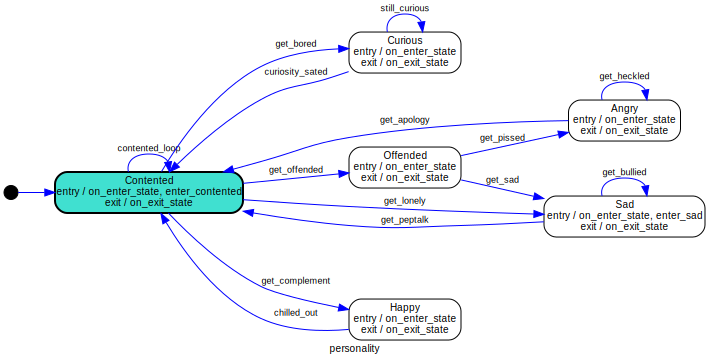

In [463]:
sm